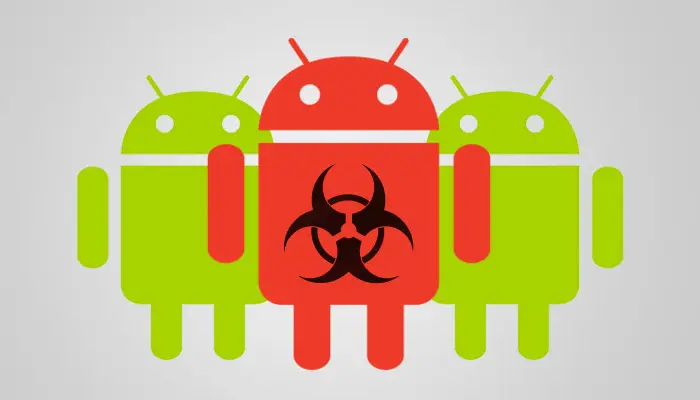

Решение датасета Android Malware Detection
https://www.kaggle.com/datasets/joebeachcapital/tuandromd/data

# 1. Импортируем необходимые библиотеки и загружаем данные.

In [1]:
# Импортируем библитеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("TUANDROMD.csv") # Загружаем данные
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
ACCESS_ALL_DOWNLOADS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACCESS_CACHE_FILESYSTEM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACCESS_CHECKIN_PROPERTIES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACCESS_COARSE_LOCATION,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACCESS_COARSE_UPDATES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
Landroid/telephony/TelephonyManager;->getSimOperatorName,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Landroid/telephony/TelephonyManager;->getSimCountryIso,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
Landroid/telephony/TelephonyManager;->getSimSerialNumber,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lorg/apache/http/impl/client/DefaultHttpClient;->execute,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div align="center">
    <h1>О наборе данных</h1>
</div>
    
Набор данных TUNADROMD содержит 4465 экземпляров и 241 атрибут. Целевым атрибутом для классификации является категория (вредоносное ПО против хорошего ПО). (N.B. Это предварительно обработанная версия TUANDROMD)

Переменные:

1-214: Признаки, основанные на разрешениях
215-241: Функции на основе API

Метки классов:1) вредоносное ПО (Malware) 2) доброе ПО (Goodware)

# 2. EDA (Разведочный анализ данных)

In [3]:
print(f"Датасет имеет {df.shape[0]} строк и {df.shape[1]} признаков")

Датасет имеет 4465 строк и 242 признаков


In [4]:
for column in df.columns:
    print(f"{column}. Уникальные значения: {set(df[column].unique())}. Количество пропущенных значений: {df[column].isna().sum()}")

ACCESS_ALL_DOWNLOADS. Уникальные значения: {0.0, 1.0, nan}. Количество пропущенных значений: 1
ACCESS_CACHE_FILESYSTEM. Уникальные значения: {0.0, 1.0, nan}. Количество пропущенных значений: 1
ACCESS_CHECKIN_PROPERTIES. Уникальные значения: {0.0, 1.0, nan}. Количество пропущенных значений: 1
ACCESS_COARSE_LOCATION. Уникальные значения: {0.0, 1.0, nan}. Количество пропущенных значений: 1
ACCESS_COARSE_UPDATES. Уникальные значения: {0.0, 1.0, nan}. Количество пропущенных значений: 1
ACCESS_FINE_LOCATION. Уникальные значения: {0.0, 1.0, nan}. Количество пропущенных значений: 1
ACCESS_LOCATION_EXTRA_COMMANDS. Уникальные значения: {0.0, 1.0, nan}. Количество пропущенных значений: 1
ACCESS_MOCK_LOCATION. Уникальные значения: {0.0, 1.0, nan}. Количество пропущенных значений: 1
ACCESS_MTK_MMHW. Уникальные значения: {0.0, 1.0, nan}. Количество пропущенных значений: 1
ACCESS_NETWORK_STATE. Уникальные значения: {0.0, 1.0, nan}. Количество пропущенных значений: 1
ACCESS_PROVIDER. Уникальные значен

Все признаки в датасете являются бинарными и в каждом из них присутсвует одно пропущеннное значение. Так же целевая переменная имеет тип object, её необходимо закодировать.

In [5]:
df = df.dropna() # Удаляем запись с пропущенными данными
print(f"Датасет после удаления строк имеет {df.shape[0]} строк и {df.shape[1]} признаков")

Датасет после удаления строк имеет 4464 строк и 242 признаков


In [6]:
lb = LabelEncoder()
df['Label'] = lb.fit_transform(df['Label'])
print(f"Классы: {lb.classes_}")
df.head().T

Классы: ['goodware' 'malware']


,0,1,2,3,4
ACCESS_ALL_DOWNLOADS,0.0,0.0,0.0,0.0,0.0
ACCESS_CACHE_FILESYSTEM,0.0,0.0,0.0,0.0,0.0
ACCESS_CHECKIN_PROPERTIES,0.0,0.0,0.0,0.0,0.0
ACCESS_COARSE_LOCATION,0.0,0.0,0.0,0.0,0.0
ACCESS_COARSE_UPDATES,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
Landroid/telephony/TelephonyManager;->getSimOperatorName,0.0,0.0,0.0,0.0,0.0
Landroid/telephony/TelephonyManager;->getSimCountryIso,0.0,1.0,0.0,1.0,0.0
Landroid/telephony/TelephonyManager;->getSimSerialNumber,0.0,0.0,0.0,0.0,0.0
Lorg/apache/http/impl/client/DefaultHttpClient;->execute,1.0,0.0,0.0,0.0,0.0


Целевая переменная закодирована следующим образом: 1 - вредоносное ПО, 2 - доброе ПО

In [7]:
df['Label'].value_counts() / df.shape[0] * 100

Label
1    79.861111
0    20.138889
Name: count, dtype: float64

Можно заметить, что присутствует дисбаланс целевого признака

In [8]:
for column in df.columns:
    df[column] = df[column].astype(int) # Переведём все колонки в тип int
    print(f"{column}: {df[column].value_counts()}")

ACCESS_ALL_DOWNLOADS: ACCESS_ALL_DOWNLOADS
0    4460
1       4
Name: count, dtype: int64
ACCESS_CACHE_FILESYSTEM: ACCESS_CACHE_FILESYSTEM
0    4460
1       4
Name: count, dtype: int64
ACCESS_CHECKIN_PROPERTIES: ACCESS_CHECKIN_PROPERTIES
0    4442
1      22
Name: count, dtype: int64
ACCESS_COARSE_LOCATION: ACCESS_COARSE_LOCATION
0    4092
1     372
Name: count, dtype: int64
ACCESS_COARSE_UPDATES: ACCESS_COARSE_UPDATES
0    4433
1      31
Name: count, dtype: int64
ACCESS_FINE_LOCATION: ACCESS_FINE_LOCATION
0    4072
1     392
Name: count, dtype: int64
ACCESS_LOCATION_EXTRA_COMMANDS: ACCESS_LOCATION_EXTRA_COMMANDS
0    4362
1     102
Name: count, dtype: int64
ACCESS_MOCK_LOCATION: ACCESS_MOCK_LOCATION
0    4358
1     106
Name: count, dtype: int64
ACCESS_MTK_MMHW: ACCESS_MTK_MMHW
0    4463
1       1
Name: count, dtype: int64
ACCESS_NETWORK_STATE: ACCESS_NETWORK_STATE
1    2662
0    1802
Name: count, dtype: int64
ACCESS_PROVIDER: ACCESS_PROVIDER
0    4464
Name: count, dtype: int64
ACCESS_SE

Гипотеза: Можно заметить, что присутствует некоторое количество признаков, которые не несут информативности.

# 3. Проверка гипотезы
## 3.1. Выделение более значимых признаков.

In [9]:
lasso = Lasso(alpha=0.0004)
lasso.fit(df.drop("Label", axis=1), df["Label"])
columns_not_null = []
for i in range(len(lasso.coef_)):
    if(lasso.coef_[i]!=0):
        columns_not_null.append(df.drop("Label", axis=1).columns[i])
columns_not_null

['ACCESS_COARSE_LOCATION',
 'ACCESS_FINE_LOCATION',
 'ACCESS_NETWORK_STATE',
 'ACCESS_WIFI_STATE',
 'BATTERY_STATS',
 'BLUETOOTH',
 'CALL_PHONE',
 'CHANGE_NETWORK_STATE',
 'CLEAR_APP_CACHE',
 'DISABLE_KEYGUARD',
 'FLASHLIGHT',
 'GET_ACCOUNTS',
 'GET_TASKS',
 'INTERNET',
 'KILL_BACKGROUND_PROCESSES',
 'MANAGE_ACCOUNTS',
 'NFC',
 'PROCESS_OUTGOING_CALLS',
 'READ_CALL_LOG',
 'READ_CONTACTS',
 'READ_EXTERNAL_STORAGE',
 'READ_LOGS',
 'READ_PHONE_STATE',
 'READ_SMS',
 'READ_SOCIAL_STREAM',
 'RECEIVE_BOOT_COMPLETED',
 'RECEIVE_SMS',
 'RECEIVE_WAP_PUSH',
 'RECORD_AUDIO',
 'RESTART_PACKAGES',
 'SEND_SMS',
 'SET_TIME_ZONE',
 'SYSTEM_ALERT_WINDOW',
 'USE_SIP',
 'VIBRATE',
 'WAKE_LOCK',
 'WRITE_EXTERNAL_STORAGE',
 'WRITE_INTERNAL_STORAGE',
 'WRITE_SETTINGS',
 'WRITE_SOCIAL_STREAM',
 'Ljava/lang/reflect/Method;->invoke',
 'Ljavax/crypto/Cipher;->doFinal',
 'Ljava/lang/Runtime;->exec',
 'Ljava/lang/System;->load',
 'Ldalvik/system/DexClassLoader;->loadClass',
 'Ljava/net/URL;->openConnection',
 'Lan

## 3.2. Проверка с использованием LogisticRegression

In [10]:
# Проверка точность на всех признаках
X_train, X_test, y_train, y_test = train_test_split(df.drop("Label", axis=1), df["Label"], 
                                                    test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)
print(f"Точность LogisticRegression со всеми признаками: {round(accuracy_score(y_test, clf.predict(X_test)) * 100, 3)} %")

Точность LogisticRegression со всеми признаками: 98.432 %


In [11]:
# Проверка точности на отобранных признаках
X_train, X_test, y_train, y_test = train_test_split(df[columns_not_null], df["Label"], test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)
print(f"Точность LogisticRegression с отобранными признаками: {round(accuracy_score(y_test, clf.predict(X_test)) * 100, 3)} %")

Точность LogisticRegression с отобранными признаками: 98.544 %


Итог: Гипотеза оправдала себя на практике.

# 4. Обучение моделей

In [12]:
# Создадим массив с раздичными моделями
models = [
    SVC(),
    MLPClassifier(random_state=1, max_iter=300),
    xgb.XGBClassifier(objective="binary:logistic", random_state=42),
    LogisticRegression(), 
    AdaBoostClassifier(n_estimators=2000),
    KNeighborsClassifier(n_neighbors=10),
    RandomForestClassifier(n_estimators=100, max_features='log2'),
    DecisionTreeClassifier(max_depth=10),
    GaussianProcessClassifier(),
    GradientBoostingClassifier(n_estimators=2000),
    HistGradientBoostingClassifier(max_iter=100),
]

In [13]:
best_model = None # Лучшая модель
best_acc = None # Лучшая точность у модели
best_loss = None # Лучшая ошибка у модели
for clf in models:
    clf.fit(X_train, y_train) 
    y_pred = clf.predict(X_test)

    # Высчитываем метрики
    acc = accuracy_score(y_test, y_pred) * 100
    mse = mean_squared_error(y_test, y_pred)
    cnf = confusion_matrix(y_test,y_pred)
    print(f"{clf.__class__.__name__:30}: Accuraccy: {round(acc, 4)} %, MSE: {mse:20} FP|FN: {cnf[0][1]:2}|{cnf[1][0]:2}")

    # Проверям на лучшую модель
    if best_loss != None:
        if best_loss > mse:
            best_model = clf
            best_acc = acc
            best_loss = mse
    else:
        best_model = clf
        best_acc = acc
        best_loss = mse

# Выводим лучшую модель
print("-"*92)
print(f"{best_model.__class__.__name__:30}: Accuraccy: {round(best_acc, 4)} %, MSE: {best_loss}")

SVC                           : Accuraccy: 98.7682 %, MSE: 0.012318029115341545 FP|FN:  1|10
MLPClassifier                 : Accuraccy: 99.3281 %, MSE: 0.006718924972004479 FP|FN:  4| 2
XGBClassifier                 : Accuraccy: 99.3281 %, MSE: 0.006718924972004479 FP|FN:  4| 2
LogisticRegression            : Accuraccy: 98.5442 %, MSE: 0.014557670772676373 FP|FN:  3|10
AdaBoostClassifier            : Accuraccy: 98.7682 %, MSE: 0.012318029115341545 FP|FN:  7| 4
KNeighborsClassifier          : Accuraccy: 98.5442 %, MSE: 0.014557670772676373 FP|FN:  7| 6
RandomForestClassifier        : Accuraccy: 99.5521 %, MSE: 0.004479283314669653 FP|FN:  2| 2
DecisionTreeClassifier        : Accuraccy: 98.7682 %, MSE: 0.012318029115341545 FP|FN:  6| 5
GaussianProcessClassifier     : Accuraccy: 99.2161 %, MSE: 0.007838745800671893 FP|FN:  5| 2
GradientBoostingClassifier    : Accuraccy: 99.4401 %, MSE: 0.005599104143337066 FP|FN:  3| 2
HistGradientBoostingClassifier: Accuraccy: 99.4401 %, MSE: 0.005599104

Итог: Из множества моделей наилучше является модель RandomForestClassifier, которая показала точность в 99.5521%